In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime

In [2]:
BBRI = pd.read_csv('bbri.csv')
BBCA = pd.read_csv('bbca.csv')
BBNI = pd.read_csv('bbni.csv')
BMRI = pd.read_csv('bmri.csv')

In [3]:
BBRI.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/11/2015,2095,2100,2015,2025,1321.110474,211513000
1,6/12/2015,2020,2085,2010,2075,1353.730591,151128000
2,6/15/2015,2070,2070,2030,2030,1324.372681,126700500
3,6/16/2015,2050,2120,2025,2110,1376.564697,165009500
4,6/17/2015,2130,2205,2120,2200,1435.280762,173837500


In [4]:
BBRI.index

RangeIndex(start=0, stop=1262, step=1)

In [5]:
BBRI.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1262.0,3.080123e+03,7.937777e+02,1610.000000,2.345000e+03,3.005000e+03,3.760000e+03,4.730000e+03
High,1262.0,3.113205e+03,7.961311e+02,1675.000000,2.370000e+03,3.045000e+03,3.790000e+03,4.760000e+03
Low,1262.0,3.045638e+03,7.867176e+02,1595.000000,2.326250e+03,2.980000e+03,3.710000e+03,4.690000e+03
Close,1262.0,3.079366e+03,7.917480e+02,1660.000000,2.346250e+03,3.010000e+03,3.770000e+03,4.740000e+03
Adj Close,1262.0,2.708040e+03,9.626770e+02,1082.984497,1.767724e+03,2.764183e+03,3.429534e+03,4.562036e+03
Volume,1262.0,1.208868e+08,8.255572e+07,0.000000,7.402862e+07,1.039238e+08,1.449870e+08,8.726073e+08


In [6]:
BBRI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
Date         1262 non-null object
Open         1262 non-null int64
High         1262 non-null int64
Low          1262 non-null int64
Close        1262 non-null int64
Adj Close    1262 non-null float64
Volume       1262 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 69.1+ KB


### Change date value to datetime64 type

In [7]:
BBRI['Date'] = pd.to_datetime(BBRI['Date'])
BBCA['Date'] = pd.to_datetime(BBRI['Date'])
BMRI['Date'] = pd.to_datetime(BBRI['Date'])
BBNI['Date'] = pd.to_datetime(BBRI['Date'])

In [8]:
BBRI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 7 columns):
Date         1262 non-null datetime64[ns]
Open         1262 non-null int64
High         1262 non-null int64
Low          1262 non-null int64
Close        1262 non-null int64
Adj Close    1262 non-null float64
Volume       1262 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 69.1 KB


### Close price BBRI 5 years

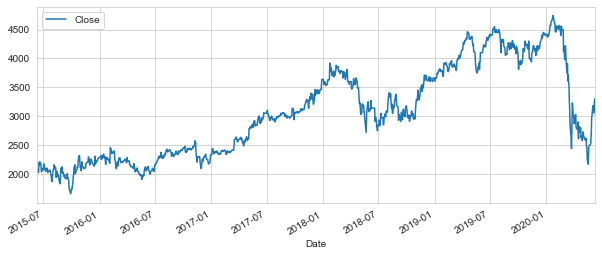

In [9]:
BBRI.plot(x='Date', y='Close', legend=True, figsize=(10,4))
plt.ioff()

### Volume traded BBRI

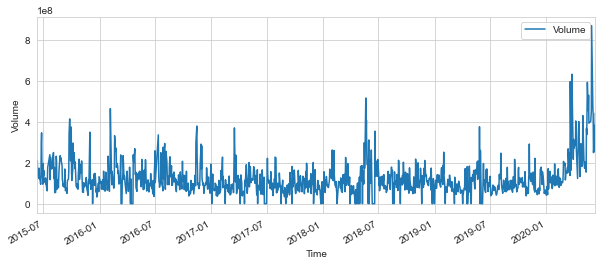

In [10]:
title = 'VOLUME TRADED'
ylabel = 'Volume'
xlabel = 'Time'

ax = BBRI.plot(x='Date', y='Volume', legend=True, figsize=(10,4))
ax.autoscale(axis='x', tight=True)
ax.set(xlabel = xlabel, ylabel = ylabel)
plt.ioff()

### Moving Average BBRI

In [11]:
BBRI['close_10'] = BBRI['Close'].rolling(10).mean()
BBRI['close_50'] = BBRI['Close'].rolling(50).mean()

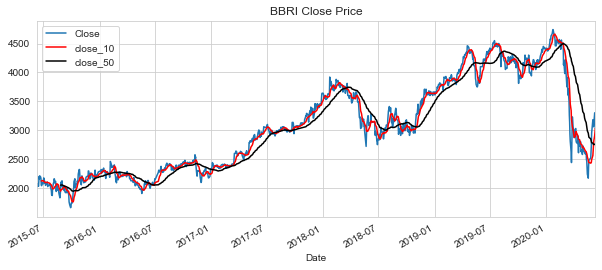

In [12]:
ax=BBRI.plot(x='Date',y='Close',title='BBRI Close Price',figsize=(10,4))
BBRI.plot(x='Date',y='close_10',color='red',ax=ax)
BBRI.plot(x='Date',y='close_50',color='k',ax=ax)
plt.ioff()

### Daily Return BBRI

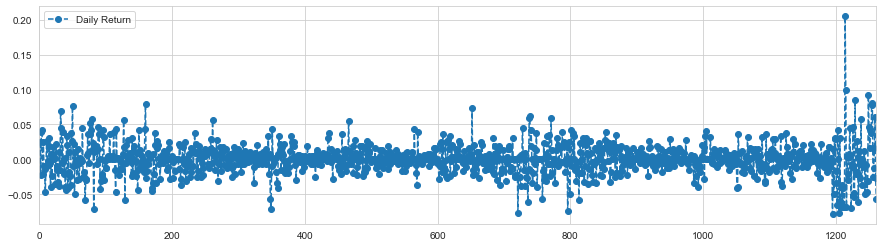

In [13]:
BBRI['Daily Return']=BBRI['Close'].pct_change()
BBRI['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

Maximum daily fluctuation in BBRI stock is 20% 

### Average Daily Return

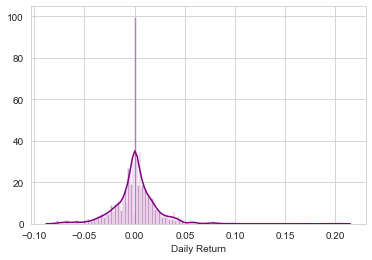

In [14]:
sns.distplot(BBRI['Daily Return'].dropna(),bins=200,color='purple')
plt.ioff()

<function matplotlib.pyplot.ioff()>

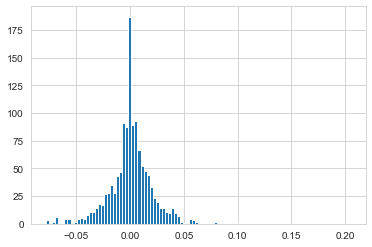

In [15]:
BBRI['Daily Return'].hist(bins=100)
plt.ioff

Stock fluctuation BBRI follows a normal distribution between +5% and -5%

### Corellation between other Bank companies stocks

In [16]:
df = BBRI['Date'].copy()
df = pd.DataFrame(df)
df['BBRI'] = BBRI['Close']
df['BBNI'] = BBNI['Close']
df['BBCA'] = BBCA['Close']
df['BMRI'] = BMRI['Close']
df.drop(['Date'], axis = 1, inplace = True, errors = 'ignore')
df.head()

,BBRI,BBNI,BBCA,BMRI
0,2025,5575,13350,4837.5
1,2075,5625,13250,4950.0
2,2030,5375,13300,4712.5
3,2110,5500,13350,4775.0
4,2200,5650,13725,4912.5


In [17]:
banks = df.pct_change()
banks = pd.DataFrame(banks)
banks['Date'] = BBRI['Date']
banks.shape

(1262, 5)

In [18]:
banks.head()

,BBRI,BBNI,BBCA,BMRI,Date
0,NaN,NaN,NaN,NaN,2015-06-11
1,0.024691,0.008969,-0.007491,0.023256,2015-06-12
2,-0.021687,-0.044444,0.003774,-0.047980,2015-06-15
3,0.039409,0.023256,0.003759,0.013263,2015-06-16
4,0.042654,0.027273,0.028090,0.028796,2015-06-17


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


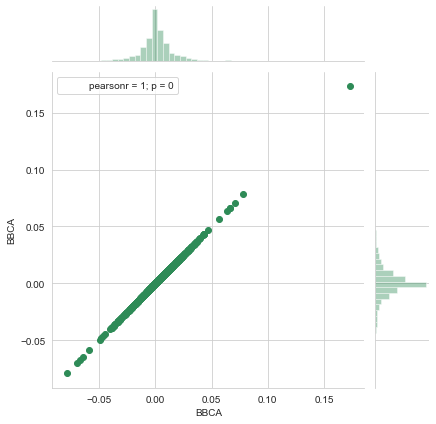

In [19]:
import scipy.stats as stats
sns.jointplot('BBCA', 'BBCA', banks, kind='scatter', color='seagreen').annotate(stats.pearsonr)
plt.ioff()

We just compared the daily percentage change of BBCA with itself.So the correlation is 1 as expected

### Comparing BBRI and BBCA

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


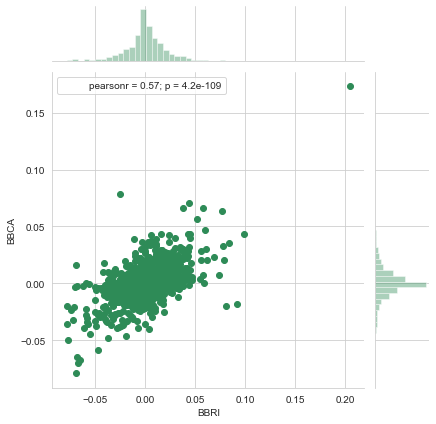

In [20]:
sns.jointplot('BBRI','BBCA',banks ,kind='scatter',color='seagreen').annotate(stats.pearsonr)
plt.ioff()

p = 0,57

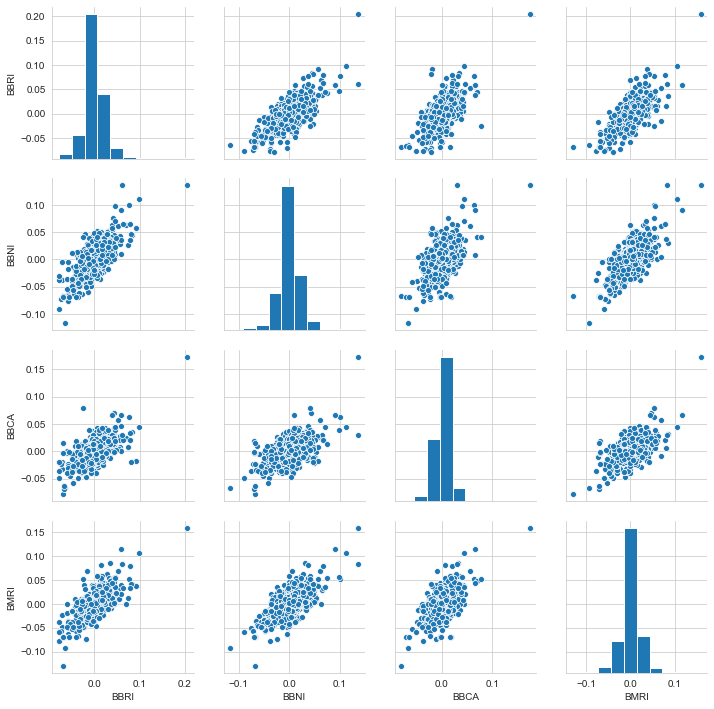

In [21]:
sns.pairplot(banks.dropna())
plt.ioff()

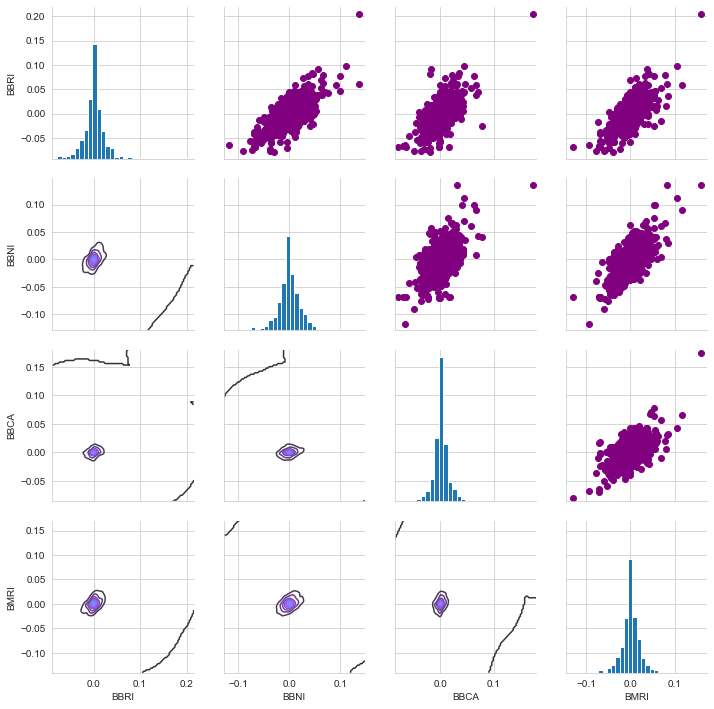

In [22]:
returns_fig=sns.PairGrid(banks.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.ioff()

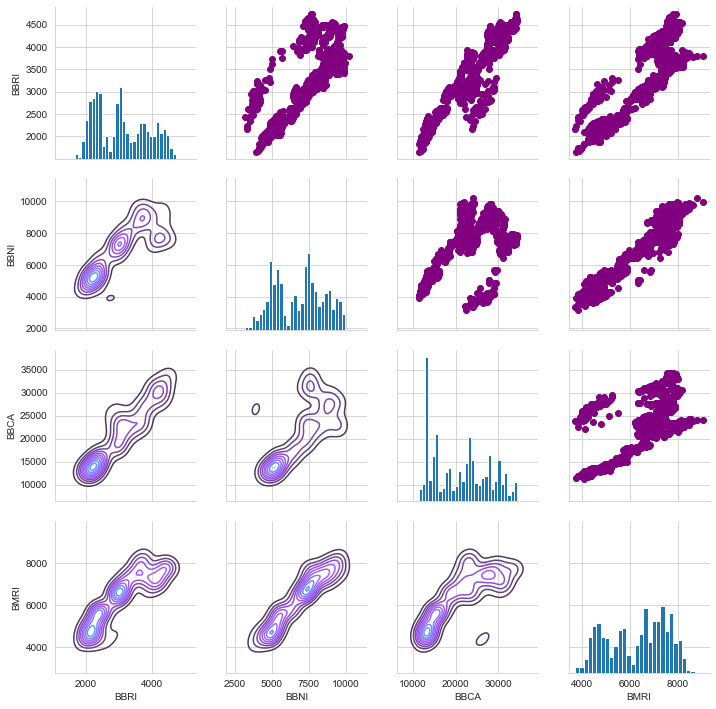

In [23]:
returns_fig=sns.PairGrid(df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.ioff()

### Daily Returns Heatmap

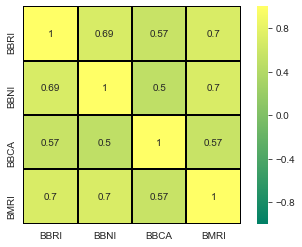

In [24]:
sns.heatmap(banks.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

### Closing Price Heatmap

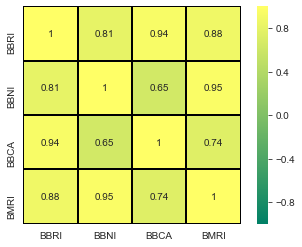

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

All have Positive Correlations

## Risk Analysis

In [26]:
rets = banks.dropna()
rets.head()

,BBRI,BBNI,BBCA,BMRI,Date
1,0.024691,0.008969,-0.007491,0.023256,2015-06-12
2,-0.021687,-0.044444,0.003774,-0.047980,2015-06-15
3,0.039409,0.023256,0.003759,0.013263,2015-06-16
4,0.042654,0.027273,0.028090,0.028796,2015-06-17
5,-0.020455,-0.022124,-0.007286,-0.015267,2015-06-18


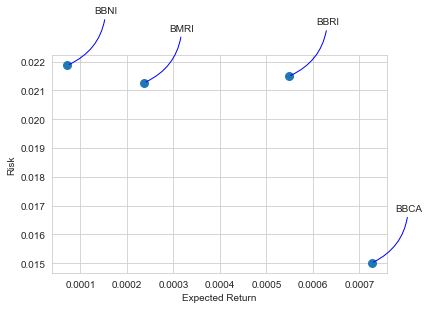

In [29]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Stock with Low risk and high return are the best stock to buy

### VaR (Value at Risk)

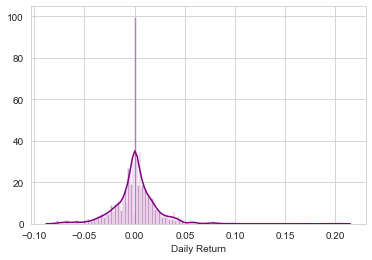

In [28]:
sns.distplot(BBRI['Daily Return'].dropna(),bins=200,color='purple')
plt.ioff()

In [59]:
rets.head()

,BBRI,BBNI,BBCA,BMRI,Date
1,0.024691,0.008969,-0.007491,0.023256,2015-06-12
2,-0.021687,-0.044444,0.003774,-0.047980,2015-06-15
3,0.039409,0.023256,0.003759,0.013263,2015-06-16
4,0.042654,0.027273,0.028090,0.028796,2015-06-17
5,-0.020455,-0.022124,-0.007286,-0.015267,2015-06-18


In [60]:
rets['BBRI'].quantile(0.05)

-0.03384615384615386

-0.033 means that 95% of the times the worst daily Loss will not exceed 3.38% for BBRI

In [61]:
rets['BBCA'].quantile(0.05)

-0.02198852772466542

-0.021 means that 95% of the times the worst daily Loss will not exceed 2.19% for BBCA

In [62]:
rets['BMRI'].quantile(0.05)

-0.03435114503816794

-0.034 means that 95% of the times the worst daily Loss will not exceed 3.43% for BMRI

In [64]:
rets['BBNI'].quantile(0.05)

-0.0357142857142857

-0.035 means that 95% of the times the worst daily Loss will not exceed 3.57% for BMRI

### VaR using Monte Carlo Method

In [69]:
days=365
dt=1/365
mu=rets.mean()['BBCA']
sigma=rets.std()['BBCA']

def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [70]:
BBCA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-11,13400,13475,13150,13350,12367.01563,12842100
1,2015-06-12,13175,13300,13125,13250,12274.37988,15485500
2,2015-06-15,13300,13325,13225,13300,12320.69824,8969800
3,2015-06-16,13275,13475,13150,13350,12367.01563,13478800
4,2015-06-17,13500,13825,13450,13725,12714.40430,13846000


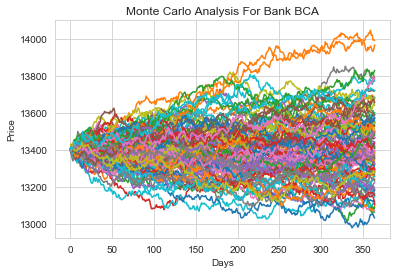

In [72]:
start_price=13400
for run in range(100):
    plt.plot(monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For Bank BCA')
plt.ioff()

In [75]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=monte_carlo(start_price,days,mu,sigma)[days-1]
    q=np.percentile(simulations,1)

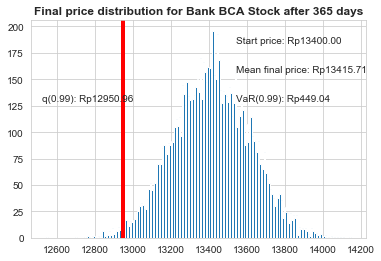

In [76]:
plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: Rp%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: Rp%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): Rp%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): Rp%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Bank BCA Stock after %s days" % days, weight='bold');

We can see from out simulation that the start price of the stock is Rp 13.400 and the mean Final Price is very close at Rp 13.415 .This means that Bank BCA stock price is quite stable and doesnt fluctuate more. VaR(0.99) = Rp 440.04 means that the maximm risk for insvestment in this stock is 449.04 which is small amount compared to the investement.

Forecasting BBRI stock Price

In [77]:
BBRI.head()

,Date,Open,High,Low,Close,Adj Close,Volume,close_10,close_50,Daily Return
0,2015-06-11,2095,2100,2015,2025,1321.110474,211513000,NaN,NaN,NaN
1,2015-06-12,2020,2085,2010,2075,1353.730591,151128000,NaN,NaN,0.024691
2,2015-06-15,2070,2070,2030,2030,1324.372681,126700500,NaN,NaN,-0.021687
3,2015-06-16,2050,2120,2025,2110,1376.564697,165009500,NaN,NaN,0.039409
4,2015-06-17,2130,2205,2120,2200,1435.280762,173837500,NaN,NaN,0.042654


In [78]:
df_prophet = BBRI[['Date', 'Close']]
dr_prophet = df_prophet.sort_values('Date')
df_prophet

,Date,Close
0,2015-06-11,2025
1,2015-06-12,2075
2,2015-06-15,2030
3,2015-06-16,2110
4,2015-06-17,2200
5,2015-06-18,2155
6,2015-06-19,2210
7,2015-06-22,2190
8,2015-06-23,2160
9,2015-06-24,2060


In [80]:
df_prophet=df_prophet.rename(columns={'Date':'ds','Close':'y'})
df_prophet

,ds,y
0,2015-06-11,2025
1,2015-06-12,2075
2,2015-06-15,2030
3,2015-06-16,2110
4,2015-06-17,2200
5,2015-06-18,2155
6,2015-06-19,2210
7,2015-06-22,2190
8,2015-06-23,2160
9,2015-06-24,2060


### Creating Prophet Model

In [90]:
import random
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-06-11,2018.413082,1628.454288,2177.588182,2018.413082,2018.413082,-117.680261,-117.680261,-117.680261,1.941184,1.941184,1.941184,-119.621445,-119.621445,-119.621445,0.0,0.0,0.0,1900.732822
1,2015-06-12,2018.987934,1650.797953,2172.904256,2018.987934,2018.987934,-99.781187,-99.781187,-99.781187,12.201321,12.201321,12.201321,-111.982507,-111.982507,-111.982507,0.0,0.0,0.0,1919.206748
2,2015-06-15,2020.712490,1659.067979,2201.784836,2020.712490,2020.712490,-94.317953,-94.317953,-94.317953,1.395759,1.395759,1.395759,-95.713712,-95.713712,-95.713712,0.0,0.0,0.0,1926.394537
3,2015-06-16,2021.287342,1640.495823,2180.839396,2021.287342,2021.287342,-98.726163,-98.726163,-98.726163,-6.406376,-6.406376,-6.406376,-92.319788,-92.319788,-92.319788,0.0,0.0,0.0,1922.561179
4,2015-06-17,2021.862194,1672.583038,2193.126253,2021.862194,2021.862194,-90.870625,-90.870625,-90.870625,-1.065405,-1.065405,-1.065405,-89.805221,-89.805221,-89.805221,0.0,0.0,0.0,1930.991569
5,2015-06-18,2022.437046,1660.436459,2204.844103,2022.437046,2022.437046,-86.128148,-86.128148,-86.128148,1.941184,1.941184,1.941184,-88.069333,-88.069333,-88.069333,0.0,0.0,0.0,1936.308898
6,2015-06-19,2023.011898,1682.020713,2226.287020,2023.011898,2023.011898,-74.801044,-74.801044,-74.801044,12.201321,12.201321,12.201321,-87.002365,-87.002365,-87.002365,0.0,0.0,0.0,1948.210854
7,2015-06-22,2024.736454,1672.900617,2228.408199,2024.736454,2024.736454,-85.248153,-85.248153,-85.248153,1.395759,1.395759,1.395759,-86.643912,-86.643912,-86.643912,0.0,0.0,0.0,1939.488301
8,2015-06-23,2025.311306,1658.301340,2226.108184,2025.311306,2025.311306,-93.484057,-93.484057,-93.484057,-6.406376,-6.406376,-6.406376,-87.077681,-87.077681,-87.077681,0.0,0.0,0.0,1931.827249
9,2015-06-24,2025.886158,1671.716315,2211.627380,2025.886158,2025.886158,-88.664170,-88.664170,-88.664170,-1.065405,-1.065405,-1.065405,-87.598765,-87.598765,-87.598765,0.0,0.0,0.0,1937.221988


### BBRI Stock forecast for One years Period

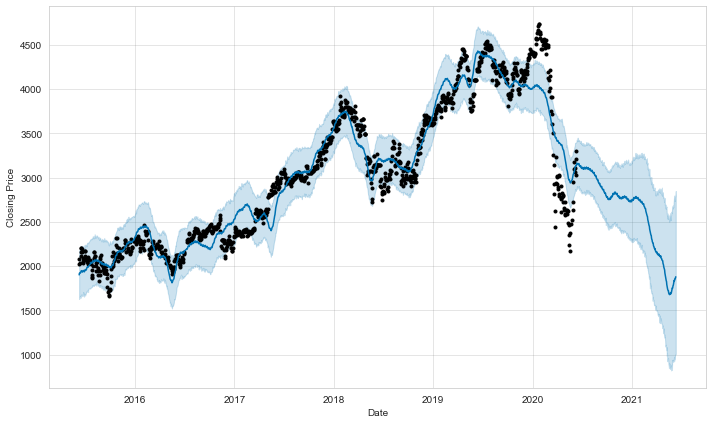

In [91]:
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')

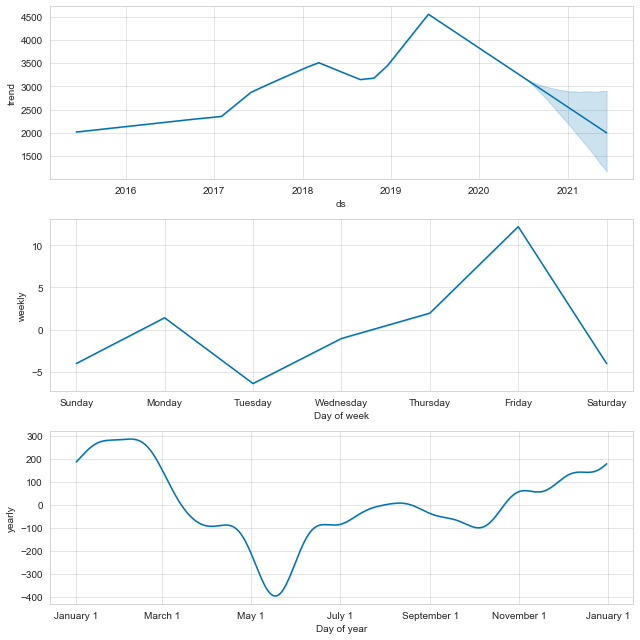

In [92]:
figure=m.plot_components(forecast)

### BBCA

In [93]:
df_prophet_bbca = BBCA[['Date', 'Close']]
dr_prophet_bbca = df_prophet_bbca.sort_values('Date')
df_prophet_bbca = df_prophet_bbca.rename(columns={'Date':'ds','Close':'y'})

In [94]:
m_bbca = Prophet()
m_bbca.fit(df_prophet_bbca)
future_bbca = m_bbca.make_future_dataframe(periods=365)
forecast_bbca = m_bbca.predict(future_bbca)
forecast_bbca

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-06-11,14027.704651,11853.510130,14391.490474,14027.704651,14027.704651,-872.914640,-872.914640,-872.914640,177.418402,177.418402,177.418402,-1050.333042,-1050.333042,-1050.333042,0.0,0.0,0.0,13154.790011
1,2015-06-12,14013.512733,11960.731958,14434.674756,14013.512733,14013.512733,-857.869385,-857.869385,-857.869385,175.159767,175.159767,175.159767,-1033.029152,-1033.029152,-1033.029152,0.0,0.0,0.0,13155.643348
2,2015-06-15,13970.936979,12036.814208,14406.713723,13970.936979,13970.936979,-852.774038,-852.774038,-852.774038,161.998209,161.998209,161.998209,-1014.772247,-1014.772247,-1014.772247,0.0,0.0,0.0,13118.162941
3,2015-06-16,13956.745062,11804.593530,14261.356824,13956.745062,13956.745062,-886.355463,-886.355463,-886.355463,132.949025,132.949025,132.949025,-1019.304487,-1019.304487,-1019.304487,0.0,0.0,0.0,13070.389599
4,2015-06-17,13942.553144,11797.303202,14381.277702,13942.553144,13942.553144,-857.092469,-857.092469,-857.092469,171.427642,171.427642,171.427642,-1028.520111,-1028.520111,-1028.520111,0.0,0.0,0.0,13085.460675
5,2015-06-18,13928.361226,11878.316618,14270.916197,13928.361226,13928.361226,-864.444037,-864.444037,-864.444037,177.418402,177.418402,177.418402,-1041.862439,-1041.862439,-1041.862439,0.0,0.0,0.0,13063.917188
6,2015-06-19,13914.169308,11804.435824,14296.871782,13914.169308,13914.169308,-883.509092,-883.509092,-883.509092,175.159767,175.159767,175.159767,-1058.668859,-1058.668859,-1058.668859,0.0,0.0,0.0,13030.660215
7,2015-06-22,13871.593554,11722.359716,14116.552750,13871.593554,13871.593554,-959.978352,-959.978352,-959.978352,161.998209,161.998209,161.998209,-1121.976561,-1121.976561,-1121.976561,0.0,0.0,0.0,12911.615202
8,2015-06-23,13857.401636,11589.668365,14119.794775,13857.401636,13857.401636,-1011.497468,-1011.497468,-1011.497468,132.949025,132.949025,132.949025,-1144.446493,-1144.446493,-1144.446493,0.0,0.0,0.0,12845.904168
9,2015-06-24,13843.209718,11622.697842,14130.957242,13843.209718,13843.209718,-994.630509,-994.630509,-994.630509,171.427642,171.427642,171.427642,-1166.058151,-1166.058151,-1166.058151,0.0,0.0,0.0,12848.579209


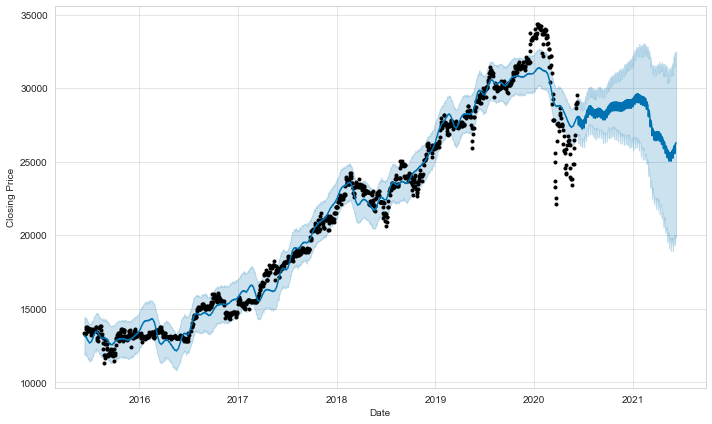

In [95]:
figure_bbca = m_bbca.plot(forecast_bbca,xlabel='Date',ylabel='Closing Price')

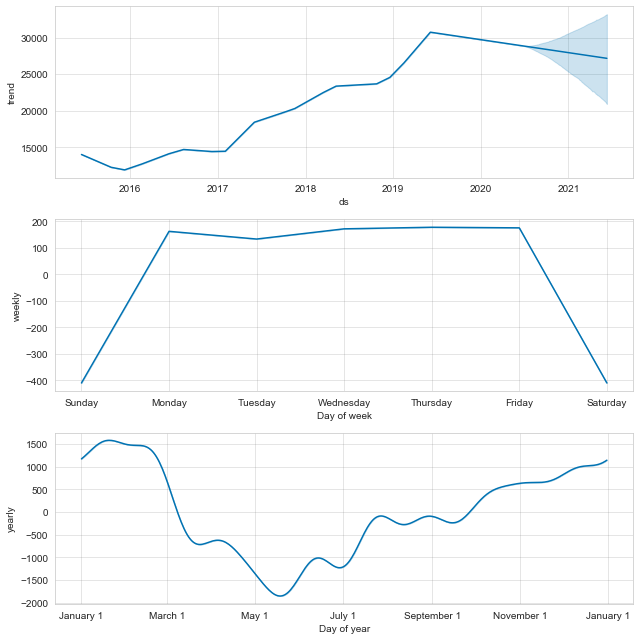

In [96]:
figure_bbca = m_bbca.plot_components(forecast_bbca)